# Run Any Kind of Logistic Regression (Binomial, Multinomial, etc.)

### Authors: Calvin Howard.

#### Last updated: March 16, 2024

Use this to run/test a statistical model on a spreadsheet.

Notes:
- To best use this notebook, you should be familar with GLM design and Contrast Matrix design. See this webpage to get started:
[FSL's GLM page](https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/GLM)

# 00 - Import CSV with All Data
**The CSV is expected to be in this format**
- ID and absolute paths to niftis are critical
```
+-----+----------------------------+--------------+--------------+--------------+
| ID  | Nifti_File_Path            | Covariate_1  | Covariate_2  | Covariate_3  |
+-----+----------------------------+--------------+--------------+--------------+
| 1   | /path/to/file1.nii.gz      | 0.5          | 1.2          | 3.4          |
| 2   | /path/to/file2.nii.gz      | 0.7          | 1.4          | 3.1          |
| 3   | /path/to/file3.nii.gz      | 0.6          | 1.5          | 3.5          |
| 4   | /path/to/file4.nii.gz      | 0.9          | 1.1          | 3.2          |
| ... | ...                        | ...          | ...          | ...          |
+-----+----------------------------+--------------+--------------+--------------+
```

Prep Output Directory

In [1]:
# Specify where you want to save your results to
out_dir = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/atrophy_seeds_2023/Figures/diagnostic_ability_mci-cn'

Import Data

In [6]:
# Specify the path to your CSV file containing NIFTI paths
input_csv_path = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/atrophy_seeds_2023/metadata/updated_with_all_adni/master_dx_updated_fix_composite.csv'
sheet = None

In [7]:
from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# Instantiate the PalmPrepararation class
cal_palm = CalvinStatsmodelsPalm(input_csv_path=input_csv_path, output_dir=out_dir, sheet=sheet)
# Call the process_nifti_paths method
data_df = cal_palm.read_and_display_data()
data_df

,Unnamed__0,subid,Age,Male,Female,CSF_Cerebellum,CSF_Subcortex,CSF_MTL,CSF_Occipital,CSF_Frontal,...,DIAGNOSIS_M12,DIAGNOSIS_BL_Str,DIAGNOSIS_CURRENT_Str,DIAGNOSIS_M12_Str,CSFGM_Cerebellum,CSFGM_MTL,CSFGM_Occipital,CSFGM_Frontal,CSFGM_Parietal,CSFGM_Temporal
0,0,002_S_0295,84.898630,1.0,0.0,-26319.38152,373.297842,-746.688684,-24081.964640,-32607.592110,...,1.0,Normal,Normal,Normal,-42080.47385,-985.079574,-49948.08397,-112828.36320,-65321.06433,-81695.87251
1,1,002_S_0413,76.397260,0.0,1.0,-13670.88871,5009.504947,-449.838607,-8185.340726,-13903.977170,...,1.0,Normal,Normal,Normal,-31877.73761,-702.013806,-32065.48546,-86785.29415,-49161.42864,-58706.57030
2,2,002_S_0559,79.410959,1.0,0.0,-38702.13792,152.392985,-754.706246,-25738.506400,-34449.367040,...,1.0,Normal,Normal,Normal,-59414.86617,-904.053254,-53596.47719,-105570.10190,-81075.10079,-72750.12881
3,3,002_S_0619,77.512329,1.0,0.0,-35472.21632,-23876.106190,-1947.061673,-51088.102680,-81475.108430,...,3.0,Alzheimer,Alzheimer,Alzheimer,-53709.90879,-2423.897611,-73659.93022,-154724.05630,-108539.66600,-121871.63710
4,4,002_S_0685,89.698630,0.0,1.0,-31092.93296,-22643.911490,-1014.786011,-32806.816640,-18280.083970,...,1.0,Normal,Normal,Normal,-51590.80915,-1294.271075,-62190.93704,-99100.38722,-102677.31680,-86601.74343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1383,1383,941_S_4365,80.410959,1.0,0.0,-38529.96216,-15404.929680,-662.636580,-45763.001790,-51966.135180,...,1.0,Normal,Alzheimer,Normal,-57889.69365,-835.677343,-72888.69964,-129545.70420,-96902.61918,-92846.76271
1384,1384,941_S_4376,76.594521,0.0,1.0,-17949.11453,-104.528538,-236.251734,-30861.230910,-12256.220060,...,1.0,Normal,Normal,Normal,-35263.89451,-633.850720,-61941.53743,-95745.37551,-78969.66905,-67336.23936
1385,1385,941_S_4377,69.421918,0.0,1.0,-15992.36193,8601.241440,-63.774856,-17403.780770,-5480.603967,...,2.0,MCI,MCI,MCI,-37613.22065,-382.094253,-48520.90317,-83404.44082,-60909.52233,-52907.83773
1386,1386,941_S_4420,81.493151,1.0,0.0,-16826.37025,-551.877244,-240.304833,-19856.342990,-43372.373360,...,2.0,MCI,MCI,MCI,-34028.22866,-420.608521,-45134.76002,-119449.11290,-72759.32267,-77463.29364


# 01 - Preprocess Your Data

**Handle NANs**
- Set drop_nans=True is you would like to remove NaNs from data
- Provide a column name or a list of column names to remove NaNs from

In [8]:
drop_list = ['DIAGNOSIS_BL_Str', 'CSF_Cerebellum']

In [9]:
data_df = cal_palm.drop_nans_from_columns(columns_to_drop_from=drop_list)
display(data_df)

,Unnamed__0,subid,Age,Male,Female,CSF_Cerebellum,CSF_Subcortex,CSF_MTL,CSF_Occipital,CSF_Frontal,...,DIAGNOSIS_M12,DIAGNOSIS_BL_Str,DIAGNOSIS_CURRENT_Str,DIAGNOSIS_M12_Str,CSFGM_Cerebellum,CSFGM_MTL,CSFGM_Occipital,CSFGM_Frontal,CSFGM_Parietal,CSFGM_Temporal
0,0,002_S_0295,84.898630,1.0,0.0,-26319.38152,373.297842,-746.688684,-24081.964640,-32607.592110,...,1.0,Normal,Normal,Normal,-42080.47385,-985.079574,-49948.08397,-112828.36320,-65321.06433,-81695.87251
1,1,002_S_0413,76.397260,0.0,1.0,-13670.88871,5009.504947,-449.838607,-8185.340726,-13903.977170,...,1.0,Normal,Normal,Normal,-31877.73761,-702.013806,-32065.48546,-86785.29415,-49161.42864,-58706.57030
2,2,002_S_0559,79.410959,1.0,0.0,-38702.13792,152.392985,-754.706246,-25738.506400,-34449.367040,...,1.0,Normal,Normal,Normal,-59414.86617,-904.053254,-53596.47719,-105570.10190,-81075.10079,-72750.12881
3,3,002_S_0619,77.512329,1.0,0.0,-35472.21632,-23876.106190,-1947.061673,-51088.102680,-81475.108430,...,3.0,Alzheimer,Alzheimer,Alzheimer,-53709.90879,-2423.897611,-73659.93022,-154724.05630,-108539.66600,-121871.63710
4,4,002_S_0685,89.698630,0.0,1.0,-31092.93296,-22643.911490,-1014.786011,-32806.816640,-18280.083970,...,1.0,Normal,Normal,Normal,-51590.80915,-1294.271075,-62190.93704,-99100.38722,-102677.31680,-86601.74343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1383,1383,941_S_4365,80.410959,1.0,0.0,-38529.96216,-15404.929680,-662.636580,-45763.001790,-51966.135180,...,1.0,Normal,Alzheimer,Normal,-57889.69365,-835.677343,-72888.69964,-129545.70420,-96902.61918,-92846.76271
1384,1384,941_S_4376,76.594521,0.0,1.0,-17949.11453,-104.528538,-236.251734,-30861.230910,-12256.220060,...,1.0,Normal,Normal,Normal,-35263.89451,-633.850720,-61941.53743,-95745.37551,-78969.66905,-67336.23936
1385,1385,941_S_4377,69.421918,0.0,1.0,-15992.36193,8601.241440,-63.774856,-17403.780770,-5480.603967,...,2.0,MCI,MCI,MCI,-37613.22065,-382.094253,-48520.90317,-83404.44082,-60909.52233,-52907.83773
1386,1386,941_S_4420,81.493151,1.0,0.0,-16826.37025,-551.877244,-240.304833,-19856.342990,-43372.373360,...,2.0,MCI,MCI,MCI,-34028.22866,-420.608521,-45134.76002,-119449.11290,-72759.32267,-77463.29364


**Drop Row Based on Value of Column**

Define the column, condition, and value for dropping rows
- column = 'your_column_name'
- condition = 'above'  # Options: 'equal', 'above', 'below'

In [10]:
data_df.columns

Index(['Unnamed__0', 'subid', 'Age', 'Male', 'Female', 'CSF_Cerebellum',
       'CSF_Subcortex', 'CSF_MTL', 'CSF_Occipital', 'CSF_Frontal',
       'CSF_Parietal', 'CSF_Temporal', 'GM_Cerebellum', 'GM_Subcortex',
       'GM_MTL', 'GM_Occipital', 'GM_Frontal', 'GM_Parietal', 'GM_Temporal',
       'WM_Cerebellum', 'WM_Subcortex', 'WM_MTL', 'WM_Occipital', 'WM_Frontal',
       'WM_Parietal', 'WM_Temporal', 'Visual_Frontal', 'Visual_Parietal',
       'Visual_Occipital', 'Visual_Temporal', 'Visual_Cerebellum',
       'Visual_Subcortex', 'Visual_MTL', 'Diagnosis', 'Sex', 'Cohort',
       'CTh_Cerebellum', 'CTh_MTL', 'CTh_Occipital', 'CTh_Frontal',
       'CTh_Parietal', 'CTh_Temporal', 'CTh_Subcortex', 'Q4', 'TOTAL11',
       'TOTALMOD', 'DX_BASELINE', 'DX_M12', 'DIAGNOSIS_BL',
       'DIAGNOSIS_CURRENT', 'DIAGNOSIS_M12', 'DIAGNOSIS_BL_Str',
       'DIAGNOSIS_CURRENT_Str', 'DIAGNOSIS_M12_Str', 'CSFGM_Cerebellum',
       'CSFGM_MTL', 'CSFGM_Occipital', 'CSFGM_Frontal', 'CSFGM_Parietal',
      

Set the parameters for dropping rows

In [13]:
column = 'Cohort'  # The column you'd like to evaluate
condition = 'equal'  # The condition to check ('equal', 'above', 'below', 'not')
value = 0 # The value to drop if found

In [14]:
data_df, other_df = cal_palm.drop_rows_based_on_value(column, condition, value)
display(data_df)

,Unnamed__0,subid,Age,Male,Female,CSF_Cerebellum,CSF_Subcortex,CSF_MTL,CSF_Occipital,CSF_Frontal,...,DIAGNOSIS_M12,DIAGNOSIS_BL_Str,DIAGNOSIS_CURRENT_Str,DIAGNOSIS_M12_Str,CSFGM_Cerebellum,CSFGM_MTL,CSFGM_Occipital,CSFGM_Frontal,CSFGM_Parietal,CSFGM_Temporal
7,7,002_S_0816,70.838356,1.0,0.0,-25421.113250,5181.427094,-602.793112,-21580.675300,-6457.362689,...,3.0,Alzheimer,Alzheimer,Alzheimer,-47581.52705,-968.299159,-48480.02305,-82219.23500,-57825.73102,-72317.97463
26,26,002_S_4270,NaN,NaN,NaN,-9935.777020,7367.389634,98.187832,-8652.081921,3367.575080,...,1.0,Normal,MCI,Normal,-32327.31371,-174.036381,-32669.62043,-74158.84788,-52781.56264,-47941.58841
46,46,005_S_0223,78.090411,0.0,1.0,-36508.497700,92.758568,-1107.849872,-13379.373810,-29762.942290,...,2.0,Normal,Alzheimer,MCI,-59467.02496,-1777.477768,-46541.58853,-116084.10820,-78075.10039,-88252.50357
55,55,005_S_0929,82.101370,1.0,0.0,-28275.840420,-25648.060410,-1012.176405,-42260.667880,-46921.094040,...,3.0,Alzheimer,Alzheimer,Alzheimer,-48931.30341,-1715.742291,-81114.78640,-135825.50850,-116966.65890,-99403.17805
70,70,006_S_4192,82.345205,1.0,0.0,-24846.165220,-12270.784020,-1214.008655,-19620.511770,-42707.797470,...,3.0,Alzheimer,Alzheimer,Alzheimer,-43427.77885,-1715.926786,-47232.82615,-123563.88610,-76137.50832,-91392.71618
83,83,007_S_0068,74.526027,0.0,1.0,-18586.549340,5293.323412,-372.249642,-15890.469040,-22380.637530,...,1.0,Normal,Normal,Normal,-37221.12252,-607.364613,-40166.88177,-103671.04070,-69569.52543,-73926.81978
85,85,007_S_0101,73.665753,1.0,0.0,-25089.932840,-5992.055223,-684.429983,-25506.744940,-50366.276050,...,2.0,MCI,Alzheimer,MCI,-38854.91456,-882.435802,-49921.72171,-126053.57800,-75491.37973,-88397.71372
102,102,009_S_1199,58.427397,1.0,0.0,-22526.696560,2011.354041,-298.484732,-15716.125910,-24973.055150,...,NaN,MCI,NaN,NaN,-36077.07378,-561.143622,-41097.26482,-93835.26558,-62937.10608,-67607.89740
109,109,009_S_4530,75.986301,1.0,0.0,-28548.952550,-3683.432145,-1001.502744,-31415.052860,-35433.138110,...,3.0,MCI,Alzheimer,Alzheimer,-41254.02220,-1231.850147,-52227.08029,-107133.47010,-73681.38462,-81423.67272
184,184,012_S_4012,68.936986,0.0,1.0,-10397.462810,11196.080020,39.600553,-3376.721920,-2436.377775,...,2.0,MCI,MCI,MCI,-28391.70256,-283.582229,-27280.01407,-70395.57229,-40242.12777,-51423.73213


**Standardize Data**
- Enter Columns you Don't want to standardize into a list

In [30]:
# Remove anything you don't want to standardize
cols_not_to_standardize = ['DX', 'SUBID'] # ['Z_Scored_Percent_Cognitive_Improvement_By_Origin_Group', 'Z_Scored_Subiculum_T_By_Origin_Group_'] #['Age']


In [ ]:
data_df = cal_palm.standardize_columns(cols_not_to_standardize)
data_df

# 00 - Define Your Formula

This is the formula relating outcome to predictors, and takes the form:
- y = B0 + B1 + B2 + B3 + . . . BN

It is defined using the columns of your dataframe instead of the variables above:
- 'Apples_Picked ~ hours_worked + owns_apple_picking_machine'

____
**Normal Logistic**
- Assesses the impact of multiple predictors on an outcome.
- formula = 'Binary Outcome ~ Predictor1 + Predictor2'

**Multiple Logistic**
- Assesses the impact of predictor on an outcome.
- formula = 'Ordinal Outcome ~ Predictor1 + Predictor2'

____
Use the printout below to design your formula. 
- Left of the "~" symbol is the thing to be predicted. 
- Right of the "~" symbol are the predictors. 
- ":" indicates an interaction between two things. 
- "*" indicates and interactions AND it accounts for the simple effects too. 
- "+" indicates that you want to add another predictor. 

In [15]:
data_df.columns

Index(['Unnamed__0', 'subid', 'Age', 'Male', 'Female', 'CSF_Cerebellum',
       'CSF_Subcortex', 'CSF_MTL', 'CSF_Occipital', 'CSF_Frontal',
       'CSF_Parietal', 'CSF_Temporal', 'GM_Cerebellum', 'GM_Subcortex',
       'GM_MTL', 'GM_Occipital', 'GM_Frontal', 'GM_Parietal', 'GM_Temporal',
       'WM_Cerebellum', 'WM_Subcortex', 'WM_MTL', 'WM_Occipital', 'WM_Frontal',
       'WM_Parietal', 'WM_Temporal', 'Visual_Frontal', 'Visual_Parietal',
       'Visual_Occipital', 'Visual_Temporal', 'Visual_Cerebellum',
       'Visual_Subcortex', 'Visual_MTL', 'Diagnosis', 'Sex', 'Cohort',
       'CTh_Cerebellum', 'CTh_MTL', 'CTh_Occipital', 'CTh_Frontal',
       'CTh_Parietal', 'CTh_Temporal', 'CTh_Subcortex', 'Q4', 'TOTAL11',
       'TOTALMOD', 'DX_BASELINE', 'DX_M12', 'DIAGNOSIS_BL',
       'DIAGNOSIS_CURRENT', 'DIAGNOSIS_M12', 'DIAGNOSIS_BL_Str',
       'DIAGNOSIS_CURRENT_Str', 'DIAGNOSIS_M12_Str', 'CSFGM_Cerebellum',
       'CSFGM_MTL', 'CSFGM_Occipital', 'CSFGM_Frontal', 'CSFGM_Parietal',
      

In [67]:
formula = "DIAGNOSIS_CURRENT_Str ~ CSFGM_Frontal + CSFGM_Parietal + CSFGM_Occipital + CSFGM_Temporal + CSFGM_MTL"

# 02 - Visualize Your Design Matrix

This is the explanatory variable half of your regression formula
_______________________________________________________
Create Design Matrix: Use the create_design_matrix method. You can provide a list of formula variables which correspond to column names in your dataframe.

- design_matrix = palm.create_design_matrix(formula_vars=["var1", "var2", "var1*var2"])
- To include interaction terms, use * between variables, like "var1*var2".
- By default, an intercept will be added unless you set intercept=False
- **don't explicitly add the 'intercept' column. I'll do it for you.**

In [68]:
# Define the design matrix
outcome_matrix, design_matrix = cal_palm.define_design_matrix(formula, data_df)
design_matrix

,Intercept,CSFGM_Frontal,CSFGM_Parietal,CSFGM_Occipital,CSFGM_Temporal,CSFGM_MTL
7,1.0,-82219.23500,-57825.73102,-48480.02305,-72317.97463,-968.299159
26,1.0,-74158.84788,-52781.56264,-32669.62043,-47941.58841,-174.036381
46,1.0,-116084.10820,-78075.10039,-46541.58853,-88252.50357,-1777.477768
55,1.0,-135825.50850,-116966.65890,-81114.78640,-99403.17805,-1715.742291
70,1.0,-123563.88610,-76137.50832,-47232.82615,-91392.71618,-1715.926786
83,1.0,-103671.04070,-69569.52543,-40166.88177,-73926.81978,-607.364613
85,1.0,-126053.57800,-75491.37973,-49921.72171,-88397.71372,-882.435802
109,1.0,-107133.47010,-73681.38462,-52227.08029,-81423.67272,-1231.850147
184,1.0,-70395.57229,-40242.12777,-27280.01407,-51423.73213,-283.582229
213,1.0,-85625.89899,-62921.64907,-39750.81842,-64283.60268,-472.948086


Check multicollinearity in design matrix

In [69]:
#Multico. Check
from calvin_utils.statistical_utils.statistical_measurements import calculate_vif
calculate_vif(design_matrix)

,features,VIF
0,Intercept,21.416042
1,CSFGM_Frontal,10.061469
2,CSFGM_Parietal,19.506578
3,CSFGM_Occipital,12.393103
4,CSFGM_Temporal,13.527930
5,CSFGM_MTL,3.520644


# 03 - Visualize Your Dependent Variable

I have generated this for you based on the formula you provided

In [70]:
# outcome_matrix = outcome_matrix.iloc[:, [0]]
outcome_matrix

,DIAGNOSIS_CURRENT_Str[Alzheimer],DIAGNOSIS_CURRENT_Str[MCI],DIAGNOSIS_CURRENT_Str[Normal]
7,1.0,0.0,0.0
26,0.0,1.0,0.0
46,1.0,0.0,0.0
55,1.0,0.0,0.0
70,1.0,0.0,0.0
83,0.0,0.0,1.0
85,1.0,0.0,0.0
109,1.0,0.0,0.0
184,0.0,1.0,0.0
213,0.0,0.0,1.0


**CRITICAL IN MULTINOMIAL LOGISTIC REGRESSION**
- A multinomial logistic reg. will set results RELATIVE TO A REFERENCE class. 
- The reference class is the first classification the multinomial encounters.
- **Especially if you are running a multinomial logistic regression, set your reference class below**

In [71]:
reference = 'Diagnosis[Control]'

# 04 - Run the Regression

Regression Results Are Displayed Below

- This will run a binomial or a multinomial logit dependig on your outcome matrix. 
- A multinomial logit will display N-1 categories, where N is the number of potential classifications you have. This occurs because everything is set in reference to that class. 
- So, the reference will either be the first column in your outcomes_matrix, or you can manually set it first.

In [72]:
from calvin_utils.statistical_utils.logistic_regression import LogisticRegression
logreg = LogisticRegression(outcome_matrix, design_matrix)
results = logreg.run()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.696244
         Iterations 9
----INTERPRETATION KEY----
reference_category : DIAGNOSIS_CURRENT_Str[Alzheimer]
y=0 : DIAGNOSIS_CURRENT_Str[MCI]
y=1 : DIAGNOSIS_CURRENT_Str[Normal]
<bound method MultinomialResults.summary2 of <statsmodels.discrete.discrete_model.MultinomialResults object at 0x16278ccd0>>


<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: MNLogit
=================================================================
Model:              MNLogit          Pseudo R-squared: 0.356     
Dependent Variable: y                AIC:              78.3070   
Date:               2024-11-05 12:39 BIC:              98.2698   
No. Observations:   39               Log-Likelihood:   -27.154   
Df Model:           10               LL-Null:          -42.147   
Df Residuals:       27               LLR p-value:      0.00086066
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     9.0000                                       
-----------------------------------------------------------------
      y = 0         Coef.  Std.Err.    t    P>|t|   [0.025 0.975]
-----------------------------------------------------------------
      Intercept     3.1064   2.4489  1.2685 0.2046 -1.6934 7.9062
  CSFGM_Frontal    -0.0000   0.0001 -0.1688 0.8660 -0.0001 0.0001
 CSFGM_Parietal    -0.0001   0.0001 -1.1826 0.2370 -0.0004 0.0001
CSFGM_Occipital     0.0002   0.0001  1.5237 0.1276 -0.0001 0.0005
 CSFGM_Temporal     0.0001   0.0001  0.6607 0.5088 -0.0001 0.0003
      CSFGM_MTL     0.0000   0.0012  0.0399 0.9681 -0.0023 0.0024
-----------------------------------------------------------------
      y = 1         Coef.  Std.Err.    t    P>|t|   [0.025 0.975]
-----------------------------------------------------------------
      Intercept    -1.8244   2.9546 -0.6175 0.5369 -7.6154 3.9666
  CSFGM_Frontal     0.0001   0.0001  0.7990 0.4243 -0.0001 0.0002
 CSFGM_Parietal    -0.0002   0.0001 -1.4102 0.1585 -0.0005 0.0001
CSFGM_Occipital     0.0001   0.0002  0.6442 0.5195 -0.0002 0.0004
 CSFGM_Temporal    -0.0001   0.0001 -0.7417 0.4583 -0.0003 0.0002
      CSFGM_MTL     0.0089   0.0037  2.4086 0.0160  0.0017 0.0161
=================================================================

"""

# 6 - Receiver Operating Characteristic
- The ROC considers clasisfications acoss ALL POSSIBLE PROBABILITIES, demonstrating what is ultiamtely accomplishable at the best possible threshold

- First curve is ROC for classifcation of each class with respect to all other classes
- Second Curve (Macro Average) is basically a meta-analytic ROC with equal weight per class.
- Third Curve (Micro Average) is basically a meta-analytic ROC with weight proportional to class sample

Taking maximum probability as prediction.
There are 16.0 observations for DIAGNOSIS_CURRENT_Str[Alzheimer]
There are 10.0 observations for DIAGNOSIS_CURRENT_Str[MCI]
There are 13.0 observations for DIAGNOSIS_CURRENT_Str[Normal]
Optimal Thresholds: 
 {0: 0.3649284076808562, 1: 0.41232691800871757, 2: 0.4599670467792798}


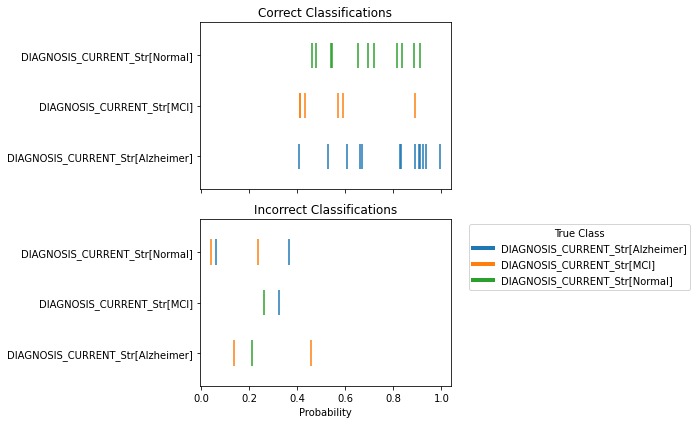

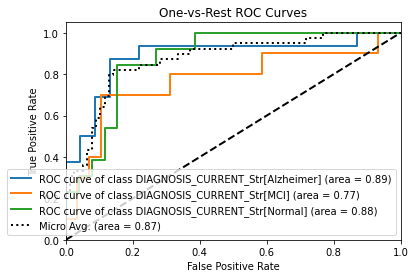

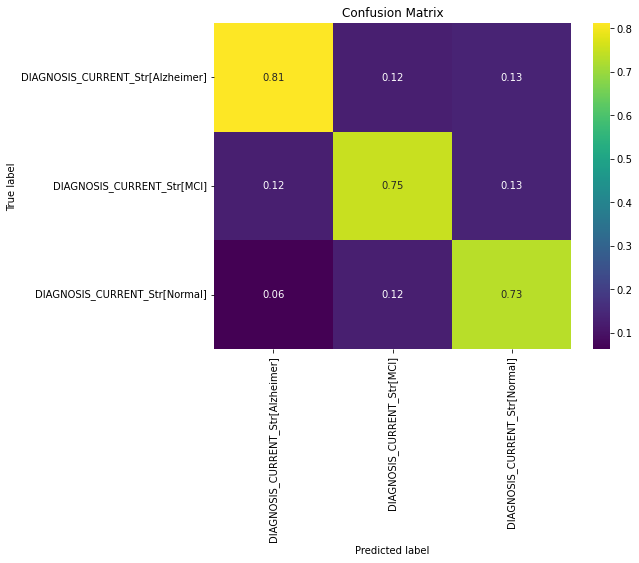

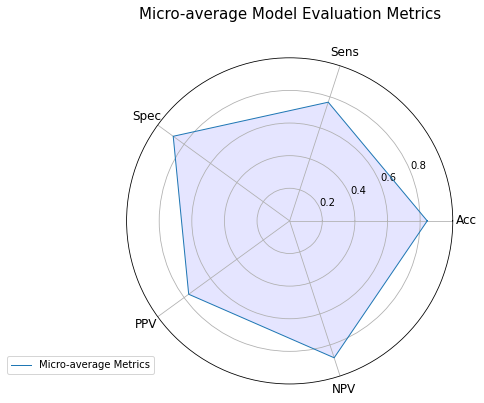

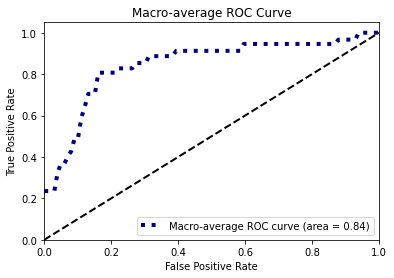

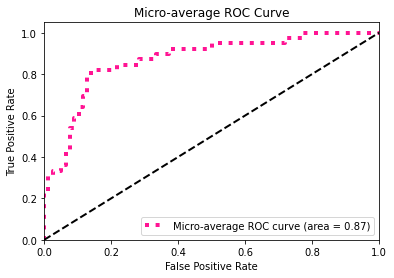

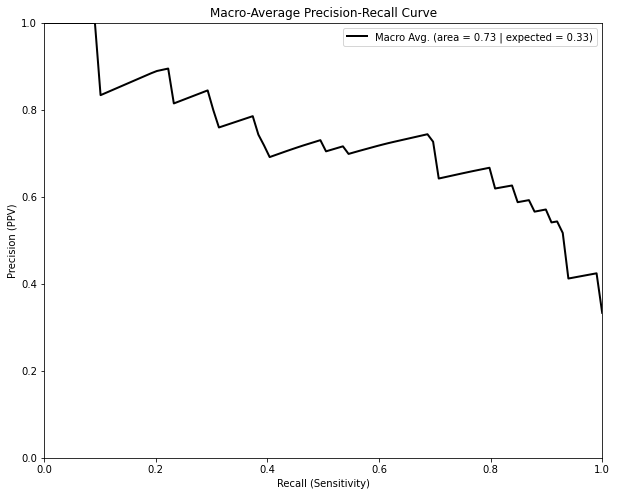

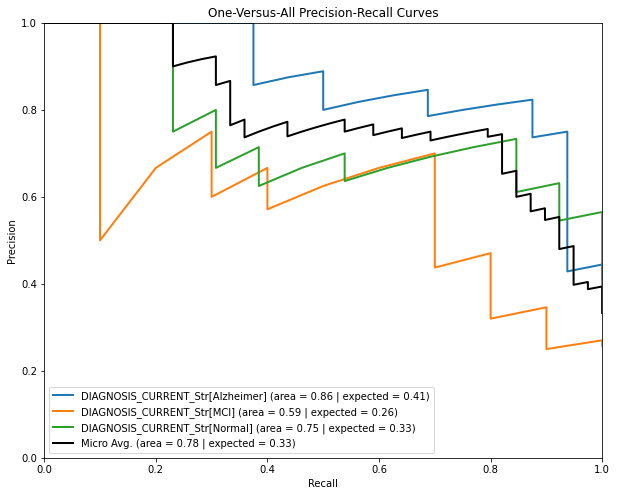

In [73]:
from calvin_utils.statistical_utils.classification_statistics import ComprehensiveMulticlassROC
evaluator = ComprehensiveMulticlassROC(fitted_model=results, observation_df=outcome_matrix, normalization='pred', thresholds=None, out_dir=out_dir)
evaluator.run()

ADVANCED
- code specific manual thresholds to intervene upon classifications

Step 1: relate integer (index) to class

In [47]:
# evaluator.relate_index_to_class()

Step 2: in a dictionary of the indices (corresponding to class), key in the lambda function to edit the probability. 
- Code from left to right, giving priority to each method. 
- Example:
```
>thresholds = {
>            0: lambda probs: 0 if probs[0] > 0.5 else (1 if probs[0] > 0.25 else 2),  # Adjust class_0 predictions
>            1: lambda probs: None,  # No threshold adjustment for class_1
>            2: lambda probs: None   # No threshold adjustment for class_2
>        }
```

In [46]:
thresholds = {
    0: lambda prob: 0,  # Always keep class 0
    1: lambda prob: 1,  # Always keep class 1
    2: lambda prob: 2 if prob[2] > 0.5 else (1 if prob[1] > 0.3 else 0)  # Conditional adjustment for class 2
}


Step 3: Check the effect

In [ ]:
# from calvin_utils.statistical_utils.classification_statistics import ComprehensiveMulticlassROC
# evaluator = ComprehensiveMulticlassROC(fitted_model=results, observation_df=outcome_matrix, normalization='pred', thresholds=thresholds, out_dir=out_dir)
# evaluator.run()

Step 4: YOU MUST LOOCV AND VALIDATE IN OUT-OF-SAMPLE DATA.
- add thresholds as an argument to any further calls to ComprehensiveMulticlassROC

Bootstrap the Micro Average AUC

In [ ]:
import matplotlib
from calvin_utils.statistical_utils.classification_statistics import bootstrap_auc
matplotlib.use('Agg')  # Use a non-interactive backend

mean_auc, lower_ci, upper_ci = bootstrap_auc(outcome_matrix, design_matrix, n_iterations=1000)
print(f'Mean AUC: {mean_auc}, 95% CI: ({lower_ci}, {upper_ci})')

Permutation Test Two AUCs

In [ ]:
data_df.columns

In [354]:
f1 = "Diagnosis ~ CerebellumCSF + ParietalCSF + MTLCSF + OccipitalCSF + FrontalCSF + temp_ins_csf + SubcortexCSF"
f2 = "Diagnosis ~ CerebellumGM + ParietalGM + MTLGM + OccipitalGM + FrontalGM + temp_ins_gm + SubcortexGM"

In [ ]:
import matplotlib
matplotlib.use('Agg')  # Use a non-interactive backend
from calvin_utils.statistical_utils.classification_statistics import permute_auc_difference
obs_diff, lower_ci, upper_ci, p_value = permute_auc_difference(data_df, formula1=f1, 
                                                                  formula2=f2,
                                                                  cal_palm=cal_palm, n_iterations=1000)
print(f'Observde AUC Difference: {obs_diff}, 95% CI: ({lower_ci}, {upper_ci}), p-value: {p_value}')

# 06 - Visualize the Regression as a Forest Plot
- This will probably look poor if you ran a regression without standardizing your data. 

In [ ]:
from calvin_utils.statistical_utils.statistical_measurements import MultinomialForestPlot

multinomial_forest = MultinomialForestPlot(model=results, sig_digits=2, out_dir=None, table=False)
multinomial_forest.run()

# 07 - Generate Partial Dependence Plots

In [ ]:
from calvin_utils.statistical_utils.statistical_measurements import PartialDependencePlot
pdp = PartialDependencePlot(formula=formula, data_df=data_df, model=results, design_matrix=design_matrix, outcomes_df=outcome_matrix, data_range=None, out_dir=None, marginal_method='mean', debug=False)
pdp.run()

# 08 - Visualize the Partial Regression Plots

In [ ]:
from calvin_utils.statistical_utils.statistical_measurements import PartialRegressionPlot
partial_plot = PartialRegressionPlot(model=results, design_matrix=design_matrix, out_dir=out_dir, palette=None)
partial_plot = partial_plot.run()

# 09 - LOOCV

In [ ]:
import pandas as pd
from calvin_utils.statistical_utils.logistic_regression import LogisticRegression
from calvin_utils.statistical_utils.classification_statistics import ComprehensiveMulticlassROC
y_true, y_pred, test_prob = LogisticRegression.run_loocv(outcome_matrix, design_matrix)
loocv_evaluator = ComprehensiveMulticlassROC(fitted_model=None, predictions_df=pd.DataFrame(test_prob, columns=outcome_matrix.columns), observation_df=outcome_matrix, normalization='pred', thresholds=None, out_dir=out_dir)
loocv_evaluator.run()

# 10 - Predict Unseen Data

In [32]:
new_csv_path='/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/collaborations/barotono_disease_classification/metadata/dataset_4/scm_validation/SCM_spatial_corr_matrix.csv'

Optional - Get New Data

In [ ]:
from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# # Instantiate the PalmPrepararation class
new_palm = CalvinStatsmodelsPalm(input_csv_path=new_csv_path, output_dir=out_dir, sheet=sheet)
# Call the process_nifti_paths method
other_df = new_palm.read_and_display_data()
other_df

In [68]:
# formula

In [59]:
# column_renaming_map = {
#                        'Mesial_Temporal': 'mesial_temporal_eh', 
#                        'parietal': 'parietal_eh', 
#                        'frontal': 'frontal_eh',
#                        'temporal': 'temporal_eh', 
#                        'ventricle':'ventricle_eh',
#                        'occipital': 'occipital_eh'}

In [60]:
# other_df.rename(columns=column_renaming_map, inplace=True)

Prepare Data

In [74]:
# Define the design matrix
# subset_df = other_df.groupby('DIAGNOSIS_BL').apply(lambda x: x.sample(min(len(x), 200))).reset_index(drop=True)
import pandas as pd
other_outcome_matrix, other_design_matrix = cal_palm.define_design_matrix(formula, other_df)

# Ensure both matrices have the same columns
if len(other_outcome_matrix.columns) != len(outcome_matrix.columns):
    # Create a zero-filled DataFrame with the same columns as outcome_matrix
    zero_df = pd.DataFrame(0, index=other_outcome_matrix.index, columns=outcome_matrix.columns)
    
    # Fill zero_df with values from other_outcome_matrix where columns exist
    common_columns = other_outcome_matrix.columns.intersection(outcome_matrix.columns)
    zero_df.loc[:, common_columns] = other_outcome_matrix.loc[:, common_columns]
    
    other_outcome_matrix = zero_df

other_outcome_matrix


,DIAGNOSIS_CURRENT_Str[Alzheimer],DIAGNOSIS_CURRENT_Str[MCI],DIAGNOSIS_CURRENT_Str[Normal]
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
4,0.0,0.0,1.0
5,1.0,0.0,0.0
...,...,...,...
1208,1.0,0.0,0.0
1278,1.0,0.0,0.0
1326,1.0,0.0,0.0
1329,1.0,0.0,0.0


Predict

Evaluate

In [75]:
formula

'DIAGNOSIS_CURRENT_Str ~ CSFGM_Frontal + CSFGM_Parietal + CSFGM_Occipital + CSFGM_Temporal + CSFGM_MTL'

In [76]:
# thresholds = {
#     0: lambda prob: 0 if prob < 0.33 else 1,
#     1: lambda prob: 1 if prob > 0.33 else 0
# }

Taking maximum probability as prediction.
There are 81.0 observations for DIAGNOSIS_CURRENT_Str[Alzheimer]
There are 24.0 observations for DIAGNOSIS_CURRENT_Str[MCI]
There are 40.0 observations for DIAGNOSIS_CURRENT_Str[Normal]
Optimal Thresholds: 
 {0: 0.5847408436738837, 1: 0.12138334789490378, 2: 0.017819063968560835}


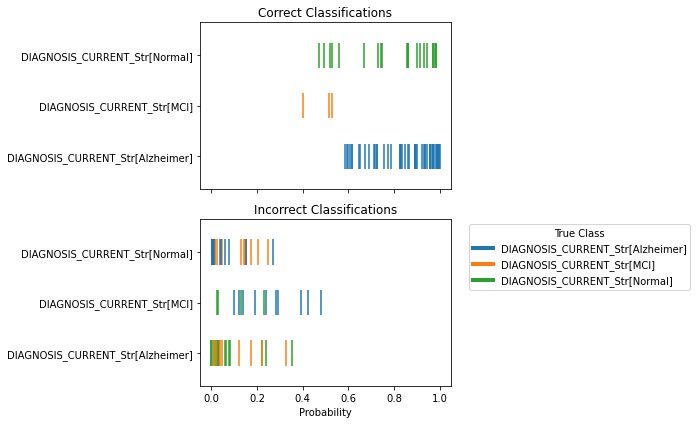

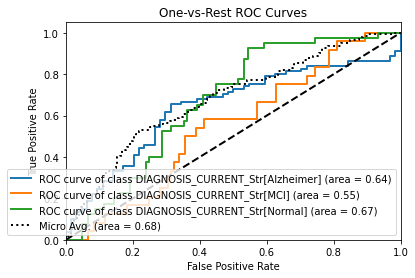

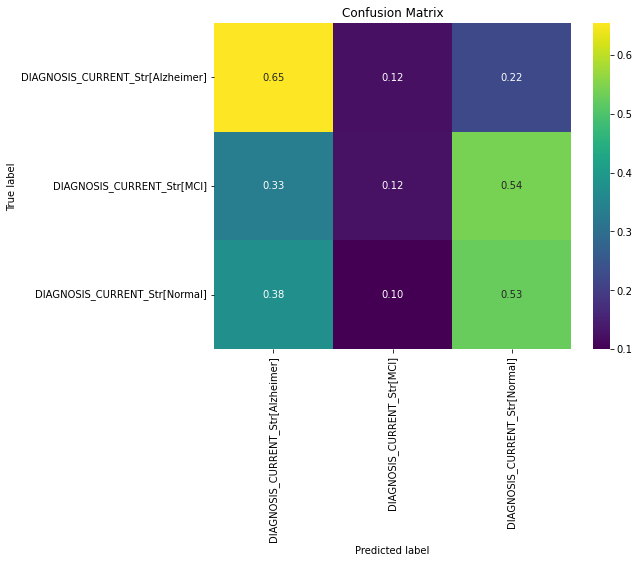

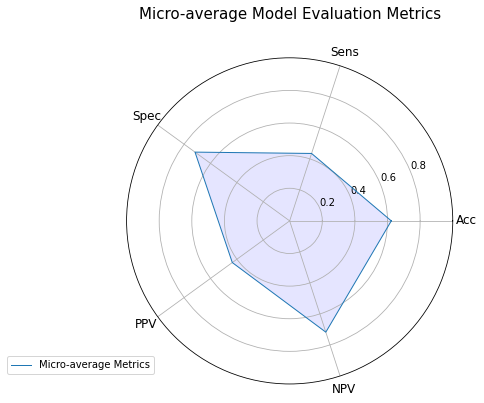

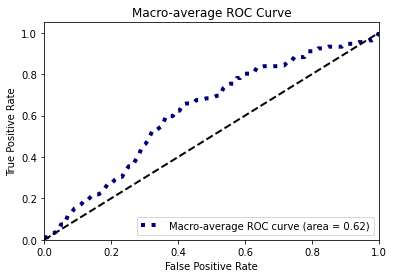

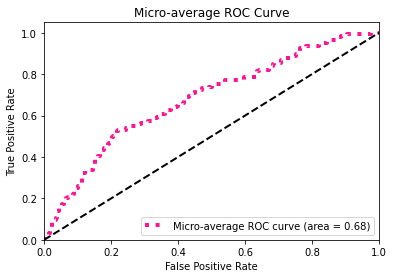

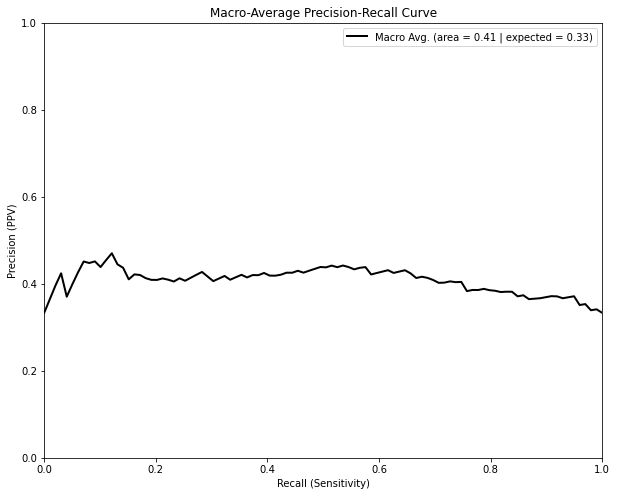

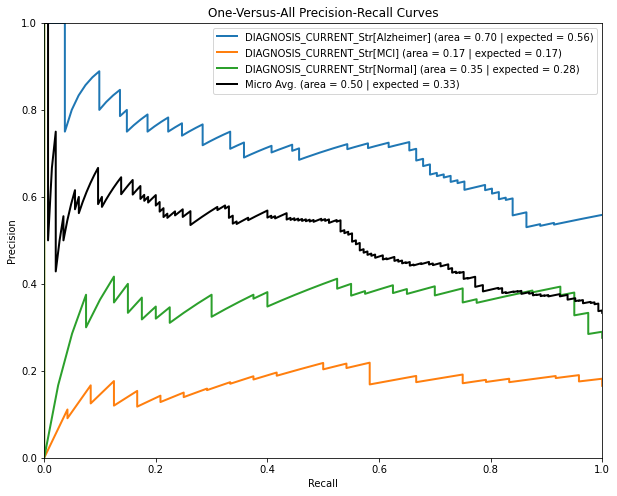

In [81]:
from calvin_utils.statistical_utils.classification_statistics import ComprehensiveMulticlassROC
loocv_evaluator = ComprehensiveMulticlassROC(fitted_model=None, predictions_df=results.predict(other_design_matrix), observation_df=other_outcome_matrix, normalization='true', thresholds=None, out_dir=out_dir)
loocv_evaluator.run()

In [78]:
loocv_evaluator.get_micro_auc()

Taking maximum probability as prediction.
There are 81.0 observations for DIAGNOSIS_CURRENT_Str[Alzheimer]
There are 24.0 observations for DIAGNOSIS_CURRENT_Str[MCI]
There are 40.0 observations for DIAGNOSIS_CURRENT_Str[Normal]


0.6794292508917954

In [79]:

###----- Functionally Programmed Functions for Evaluation Using Above Classes -----##
'''
Hanging imports to facilitate easy transplant of code.
'''
import numpy as np
from calvin_utils.statistical_utils.classification_statistics import ComprehensiveMulticlassROC
from calvin_utils.statistical_utils.logistic_regression import LogisticRegression
import os
from contextlib import redirect_stdout, redirect_stderr
from tqdm import tqdm

def resample_df(data_df):
    n_samples = data_df.shape[0]
    # Shuffle the indices
    shuffled_indices = np.random.permutation(n_samples)
    # Reorder the DataFrame based on the shuffled indices but keep the original index
    shuffled_df = data_df.iloc[shuffled_indices].reset_index(drop=True).set_index(data_df.index)
    return shuffled_df

def permute_auc_difference(data_df, formula1, formula2, cal_palm, n_iterations=1000):
    auc_diffs = []
    for i in tqdm(range(n_iterations)):
        try:
            with open(os.devnull, 'w') as fnull, redirect_stdout(fnull), redirect_stderr(fnull):
                # Define design matrices and outcome matrices for both formulas
                outcome_matrix, design_matrix1 = cal_palm.define_design_matrix(formula1, data_df)
                _, design_matrix2 = cal_palm.define_design_matrix(formula2, data_df)
                
                # Permute the outcomes
                if i == 0:
                    resampled_df = outcome_matrix
                else:
                    resampled_df = resample_df(outcome_matrix)

                # Fit the logistic regression model for the first formula
                logreg1 = LogisticRegression(resampled_df, design_matrix1)
                results1 = logreg1.run()

                # Fit the logistic regression model for the second formula
                logreg2 = LogisticRegression(resampled_df, design_matrix2)
                results2 = logreg2.run()

                # Evaluate the models
                evaluator1 = ComprehensiveMulticlassROC(fitted_model=results1, observation_df=resampled_df, normalization='true', thresholds=None, out_dir=None)
                micro_auc1 = evaluator1.get_micro_auc()

                evaluator2 = ComprehensiveMulticlassROC(fitted_model=results2, observation_df=resampled_df, normalization='true', thresholds=None, out_dir=None)
                micro_auc2 = evaluator2.get_micro_auc()

                # Store the difference in micro-average AUCs
                if i == 0:
                    obs_diff = micro_auc1 - micro_auc2
                    print(f"F1: {micro_auc1} | F2: {micro_auc2}")
                else:
                    auc_diffs.append(micro_auc1 - micro_auc2)
            
        except Exception as e:
            print(e)
            continue
    # Calculate p-value based on the distribution of differences
    auc_diffs = np.array(auc_diffs)
    p_value = np.mean(auc_diffs >= obs_diff)

    # Calculate confidence intervals for the difference
    lower_ci = np.percentile(auc_diffs, 2.5)
    upper_ci = np.percentile(auc_diffs, 97.5)
    
    return obs_diff, lower_ci, upper_ci, p_value

def bootstrap_auc(outcome_matrix, design_matrix, n_iterations=1000, model=None):
    auc_scores = []
    n_samples = outcome_matrix.shape[0]
    
    for i in tqdm(range(n_iterations)):
        # Suppress both stdout and stderr
        try:
            with open(os.devnull, 'w') as fnull, redirect_stdout(fnull), redirect_stderr(fnull):
                # Generate a bootstrap sample
                resample_idx = np.random.choice(n_samples, size=n_samples, replace=True)
                outcome_matrix_resampled = outcome_matrix.iloc[resample_idx]
                design_matrix_resampled = design_matrix.iloc[resample_idx]

                # Fit the logistic regression model
                if model is None:
                    logreg = LogisticRegression(outcome_matrix_resampled, design_matrix_resampled)
                    results = logreg.run()
                    test = ComprehensiveMulticlassROC(fitted_model=results, observation_df=outcome_matrix_resampled, normalization='true', thresholds=None, out_dir=None)
                else:
                    results = model.predict(design_matrix_resampled)
                    test = ComprehensiveMulticlassROC(fitted_model=None, predictions_df=results, observation_df=outcome_matrix_resampled, normalization='true', thresholds=None, out_dir=None)
                # Evaluate the model
                micro_auc = test.get_micro_auc()
                auc_scores.append(micro_auc)
        except:
            continue
    # Calculate confidence intervals
    lower_ci = np.percentile(auc_scores, 2.5)
    upper_ci = np.percentile(auc_scores, 97.5)    
    return np.mean(auc_scores), lower_ci, upper_ci, auc_scores


Bootstrap the Micro Average AUC

In [80]:
import matplotlib
# from calvin_utils.statistical_utils.classification_statistics import bootstrap_auc
matplotlib.use('Agg')  # Use a non-interactive backend
mean_auc, lower_ci, upper_ci, auc_dist = bootstrap_auc(other_outcome_matrix, other_design_matrix, n_iterations=1000, model=results)
print(f'Mean AUC: {mean_auc}, 95% CI: ({lower_ci}, {upper_ci})')

100%|██████████| 1000/1000 [00:01<00:00, 536.58it/s]

Mean AUC: 0.6801744827586206, 95% CI: (0.6139565992865635, 0.7449363852556482)


In [226]:
import pandas as pd
auc_df = pd.DataFrame({'val':auc_dist})
auc_df.to_csv('/path/to/df.csv')

OSError: Cannot save file into a non-existent directory: '/path/to'

In [175]:
auc_df = pd.read_csv('/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/atrophy_seeds_2023/Figures/diagnostic_ability/50fit_150pred/auc_dist.csv')

In [ ]:
import numpy as np
from scipy.stats import ttest_ind, mannwhitneyu

def compare_bootstrapped_means(distribution1, distribution2):
    """
    Compares two bootstrapped distributions using a two-sample t-test and Mann-Whitney U test.
    
    Parameters:
    - distribution1 (list or array): Bootstrapped distribution of group 1.
    - distribution2 (list or array): Bootstrapped distribution of group 2.
    
    Returns:
    - t_stat (float): t-statistic from the two-sample t-test.
    - t_p_value (float): p-value from the two-sample t-test.
    - u_stat (float): U-statistic from the Mann-Whitney U test.
    - u_p_value (float): p-value from the Mann-Whitney U test.
    """
    # Perform a two-sample t-test to compare means
    t_stat, t_p_value = ttest_ind(distribution1, distribution2)
    
    # Perform a Mann-Whitney U test to compare distributions
    u_stat, u_p_value = mannwhitneyu(distribution1, distribution2)

    return t_stat, t_p_value, u_stat, u_p_value

# Compare the distributions
t_stat, t_p_value, u_stat, u_p_value = compare_bootstrapped_means(auc_df['CSF AUCs'], auc_df['CTh AUCs'])

print(f"Two-sample t-test: t-stat = {t_stat:.4f}, p-value = {t_p_value:.4f}")
print(f"Mann-Whitney U test: U-stat = {u_stat:.4f}, p-value = {u_p_value:.4f}")


Plot Bootstraps

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_custom_bootstrap_auc(df):
    """
    Plots the mean and error bars of AUCs for each column in the DataFrame using Seaborn and Matplotlib,
    styled similarly to the reference plot.
    
    Parameters:
    - df (pd.DataFrame): DataFrame containing bootstrapped AUC distributions. 
                         Each column represents a different group.
    """
    # Initialize lists to store plotting data
    means = []
    lower_errors = []
    upper_errors = []
    y_labels = []

    # Calculate mean and confidence intervals for each column in the DataFrame, ignoring NaNs
    for column in df.columns:
        bootstrapped_values = df[column].dropna()  # Remove NaN values
        if len(bootstrapped_values) > 0:
            mean_value = np.mean(bootstrapped_values)
            lower_ci = np.percentile(bootstrapped_values, 2.5)
            upper_ci = np.percentile(bootstrapped_values, 97.5)
            
            means.append(mean_value)
            lower_errors.append(mean_value - lower_ci)
            upper_errors.append(upper_ci - mean_value)
            y_labels.append(column)

    # Create a horizontal scatter plot with error bars
    plt.figure(figsize=(6, len(means) * 1.2))  # Adjust height based on number of groups
    sns.set(style="whitegrid")
    
    # Assign colors from a color palette
    palette = sns.color_palette("tab10", len(means))

    # Plot the means as points with error bars
    for i, (mean, lower_err, upper_err, label) in enumerate(zip(means, lower_errors, upper_errors, y_labels)):
        plt.errorbar(x=mean, y=i, xerr=[[lower_err], [upper_err]], fmt='o', color=palette[i], capsize=5, markersize=10)
    
    # Customize y-ticks to match labels
    plt.yticks(range(len(y_labels)), y_labels)
    
    # Labels and title
    plt.xlabel('AUC')
    plt.ylabel('CAD Product')
    plt.title('Mean AUC with 95% CI for CAD Products')

    # Customize the grid and layout
    plt.grid(False)
    plt.xlim(0.4, 1.0)  # Set x-axis limits for AUC

    # Display the plot
    plt.tight_layout()
    plt.show()
    plt.savefig(out_dir + '/95ci.svg')

plot_custom_bootstrap_auc(auc_df)

Permutation Test Two AUCs

In [ ]:
other_df.columns

In [54]:
f1 = "Diagnosis ~ CSF_Frontal + CSF_Temporal + CSF_Parietal + CSF_Occipital + CSF_MTL + CSF_Cerebellum + CSF_Subcortex"
f2 = "Diagnosis ~ GM_Frontal + GM_Temporal + GM_Parietal + GM_Occipital + GM_MTL + GM_Cerebellum + GM_Subcortex"

In [ ]:
# from calvin_utils.statistical_utils.classification_statistics import permute_auc_difference
obs_diff, lower_ci, upper_ci, p_value = permute_auc_difference(other_df, formula1=f1, 
                                                                  formula2=f2,
                                                                  cal_palm=cal_palm, n_iterations=1000)
print(f'Observed AUC Difference: {obs_diff}, 95% CI: ({lower_ci}, {upper_ci}), p-value: {p_value}')